### Домашнее задание к Уроку 9

Нужно реализовать rest api на базе flask (пример https://github.com/fimochka-sudo/GB_docker_flask_example)

По шагам:
0. выбрать себе датасет (который интересен или нравится больше всего), сделать pipeline (преобразования + модель), сохранить его на диск. Если не хочется пайплайн, то можно без него, но так вам же будет удобнее потом вызывать его из кода сервиса.
1. установить удобную для себя среду разработки (pycharm прекрасен - https://www.jetbrains.com/pycharm/)
2. для вашего проекта вам понадобится requirements.txt с пакетами. Можно за основу взять такой файл из проекта выше. Для его установки прям в pycharm можно открыть терминал и сделать pip install -r requirements.txt (находясь в корне проекта конечно же при этом)
3. завести себе аккаунт на github (если его еще нет). У самого github есть такой "hello world" по работе с ним - https://guides.github.com/activities/hello-world/
4. итоговый проект должен содержать: 1) каталог app/models/ (здесь модель-пайплайн предобученная либо код обучения модели-пайплайна) 2) файл app/run_server.py (здесь основной код flask-приложения) 3) requirements.txt (список пакетов, которые у вас используются в проекте - в корне проекта) 4) README.md (здесь какое-то описание, что вы делаете, что за данные, как запускать и т.д) 5) Dockerfile 6) docker-entrypoint.sh
5. (<b>Опционально</b>): front-end сервис какой-то, который умеет принимать от пользователя введеные данные и ходить в ваш api. На самом деле полезно больше вам, т.к если ваш проект будет далее развиваться (новые модели, интересные подходы), то это хороший пунктик к резюме и в принципе - строчка в портфолио)

Полезные ссылки:
1. датасеты (для полета мысли): https://www.kaggle.com/datasets
2. конкурс Сбербанка по недвижимости (можно этот набор данных также взять и обучить модель предсказывать стоимость жилья - неплохой такой сервис может получиться) - https://www.kaggle.com/c/sberbank-russian-housing-market/data Там же и ноутбуки с разными подходами есть.
3. минималистичный пример связки keras/flask https://blog.keras.io/building-a-simple-keras-deep-learning-rest-api.html для определения класса картинки
4. неплохой такой пример (помимо того, что разобрали на занятии) связки docker/flask - https://cloud.croc.ru/blog/byt-v-teme/flask-prilozheniya-v-docker/
5. https://www.digitalocean.com/community/tutorials/how-to-build-and-deploy-a-flask-application-using-docker-on-ubuntu-18-04

p.s. если проблемы с выбором датасета, то пишите пожалуйста - будем вместе думать)

### Выбор датасета

Я выбрал датасет Hotel Reservations Dataset (https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)

#### Краткое описание датасета

Каналы онлайн-бронирования отелей кардинально изменили возможности бронирования и собствено патерны поведение клиентов. Значительное количество бронирований аннулируется из-за отмены или незаезда. Типичные причины отмены бронирования это изменение планов, конфликты в расписании и т.п. Это часто упрощается благодаря возможности сделать это бесплатно или с небольшим штрафом, что выгодно для гостей отеля, но менее желательно для отелей и возможно, являеться фактором снижающих доход отелей.

#### Что нужно предсказать

Нужно предсказть будет ли подтверждено бронирование или клиент откажеться от брони.

#### Краткое описание признаков датасета

1. **Booking_ID** - Уникальный идентификатор каждого бронирования
2. **no_of_adults** - Количество взрослых
3. **no_of_children** - Количество детей
4. **no_of_weekend_nights** - Количество ночей в выходные дни (Суббота и Воскресенье) которые клиент проживает или бронирует для проживания в отеле
5. **no_of_week_nights** - Количество рабочих дней в неделе (с Понедельника по Пятницу) которые клиент проживает или бронирует для проживания в отеле
6. **type_of_meal_plan** - Тип плана питания забронированного клиентом
7. **required_car_parking_space** - Признак отражающий необходимость парковочного места для клиента
8. **room_type_reserved** - Тип бронируемого номера в отеле
9. **lead_time** - Количество дней с момента бронирования до момента заезда в отель
10. **arrival_year** - Год прибытия в отель
11. **arrival_month** - Месяц прибытия в отель
12. **arrival_date** - День прибытия в отель
13. **market_segment_type** - Тип сегмента рынка
14. **repeated_guest** - являеться ли данный визит повторным
15. **no_of_previous_cancellations** - Количество отмен бронирований для данного клиента к моменту текущего бронирования
16. **no_of_previous_bookings_not_canceled** - Количество состоявшихся заездов до момента текущего бронирования
17. **avg_price_per_room** - средняя цена за номер. Цена за номер может меняться динамечиски
18. **no_of_special_requests** - Общее количество особых запросов сделанных клиентом

19. **booking_status** - Признак того было отменено бронирование или нет

### Загрузка необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import dill
import json 
from urllib import request, parse
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]

### Обзор данных датасета

In [4]:
df = pd.read_csv('Hotel_Reservations.csv')
print("Размер датасета:",df.shape)
df.head()

Размер датасета: (36275, 19)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Пропусков нет

In [6]:
df.duplicated().sum()

0

Повторяющихся строк нет

In [7]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

**Присутствует дисбаланс классов для целевого признака**

### Анализ признаков

Посмотри на общее количество детей и взрослых

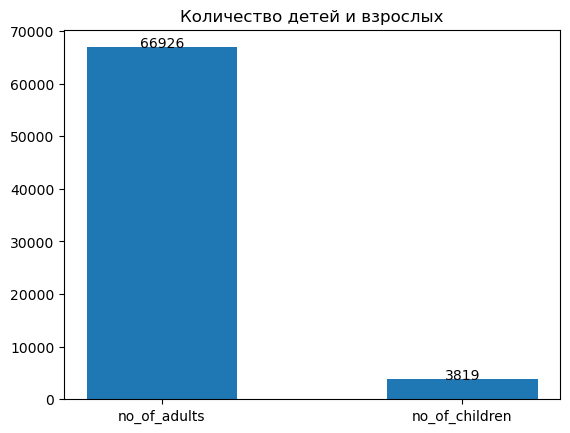

In [9]:
fig, ax = plt.subplots()
ax.bar(np.arange(2),[df.no_of_adults.sum(),df.no_of_children.sum()],width=0.5)
plt.xticks(np.arange(2),("no_of_adults","no_of_children"))
plt.title("Количество детей и взрослых");
for i, v in enumerate([df.no_of_adults.sum(),df.no_of_children.sum()]):
    ax.text(i, v + 0.5, str(v), ha='center')

Распределение резервирования номеров по дням месяца

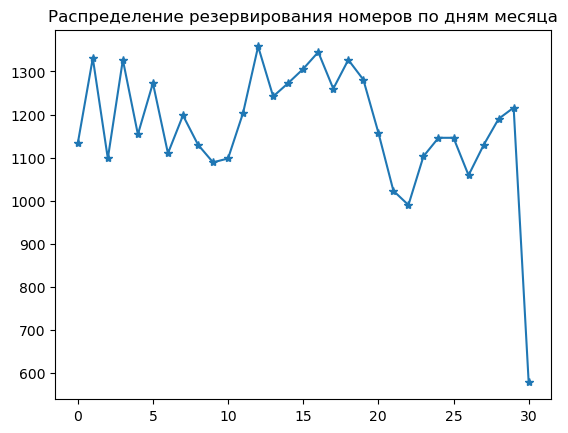

In [10]:
plt.plot(df.arrival_date.value_counts().sort_index().values,"*-");
plt.title("Распределение резервирования номеров по дням месяца");

Срядняя цена за номер по каждому типу

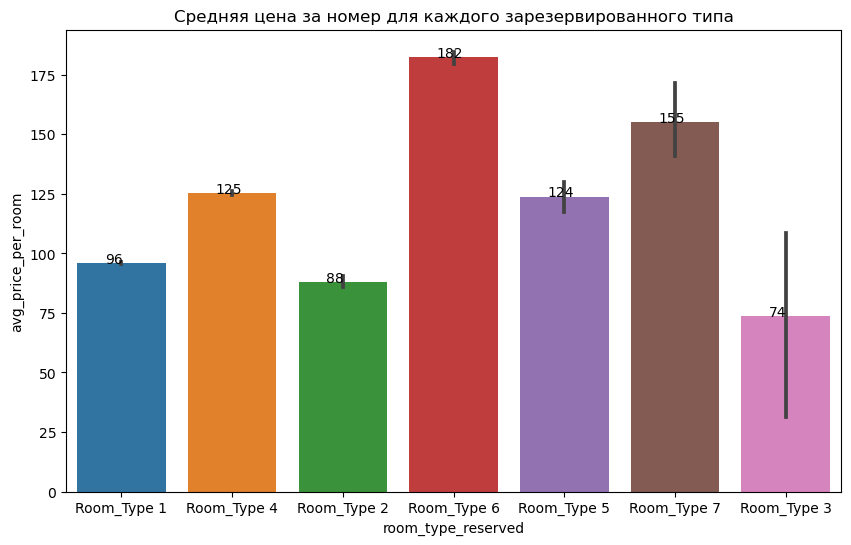

In [11]:
plt.figure(figsize=(10,6))
ax = sns.barplot(df.room_type_reserved, df.avg_price_per_room)
plt.title("Средняя цена за номер для каждого зарезервированного типа");
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

**Самыми дорогими номерами являються номера 6 типа, самыми дешевыми номера 3 типа**

Посмотрим как распределяються наши данные по годам

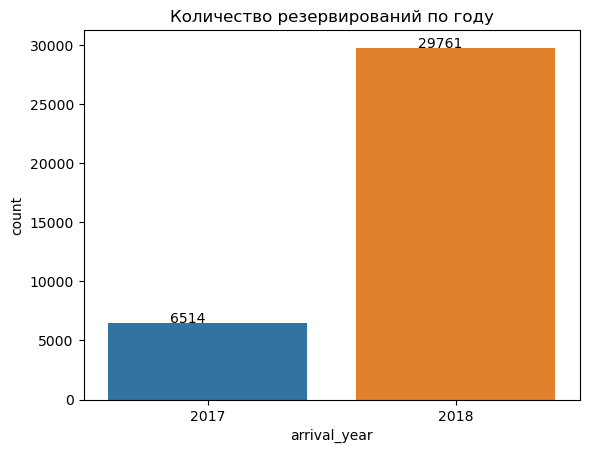

In [12]:
ax = sns.countplot(df.arrival_year)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("Количество резервирований по году");

**Большинство резервирований  в данных за 2018 год**

Посмотрим на распределение отмен резервирования по месяцам

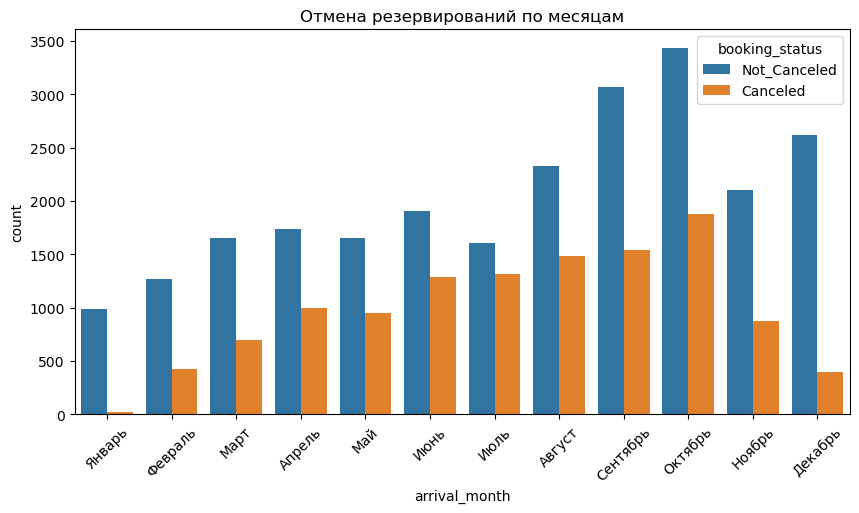

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(df.arrival_month,hue=df.booking_status)
plt.xticks(np.arange(0,12),["Январь","Февраль","Март","Апрель","Май","Июнь",
                           "Июль","Август","Сентябрь","Октябрь","Ноябрь","Декабрь"],rotation=45)
plt.title("Отмена резервирований по месяцам");

Посмотрим на выбросы по статусу резервирования в зависимости от количества дней резервирования до заезда

Text(0.5, 1.0, 'Статус резервирования в зависимости от дней резервирования до заезда')

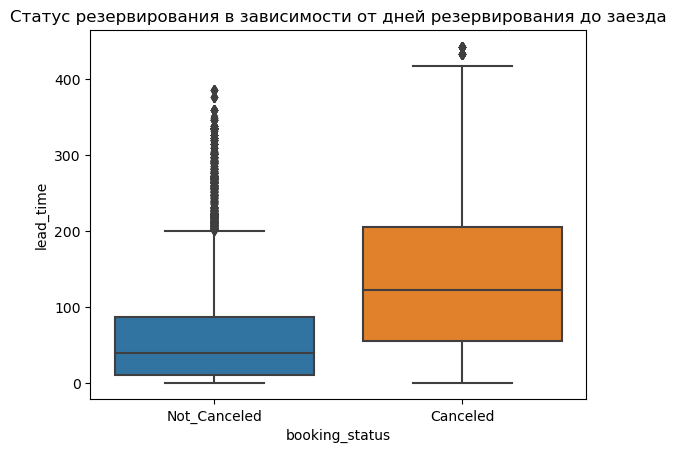

In [14]:
sns.boxplot(df.booking_status, df.lead_time)
plt.title("Статус резервирования в зависимости от дней резервирования до заезда")

**Исходя из графика можно сказать что с ростом количества дней резерьвирования до вьезда, вероятность отмены растет**

Посмотрим на влияние количества особых запросов клиентов на статус резервирования

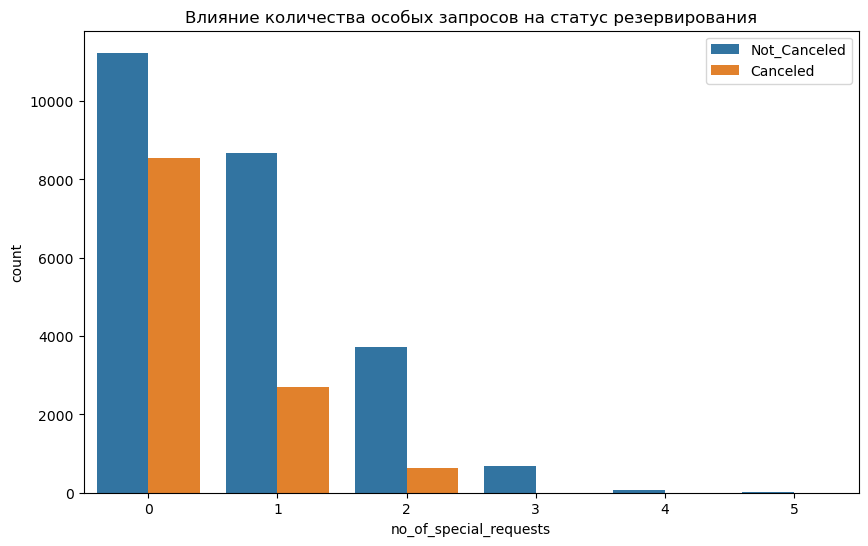

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(df.no_of_special_requests, hue=df.booking_status)
plt.title("Влияние количества особых запросов на статус резервирования");
plt.legend(loc="upper right")

**Клиенты которые не имеют особых запросов более склонны к отмене резервирования**

Посмотрим как влияет на статус резервирования клиенты с повторным посещением в сравнении с клиентами не посещавших отель ранее

In [16]:
df.groupby("repeated_guest")["booking_status"].value_counts()

repeated_guest  booking_status
0               Not_Canceled      23476
                Canceled          11869
1               Not_Canceled        914
                Canceled             16
Name: booking_status, dtype: int64

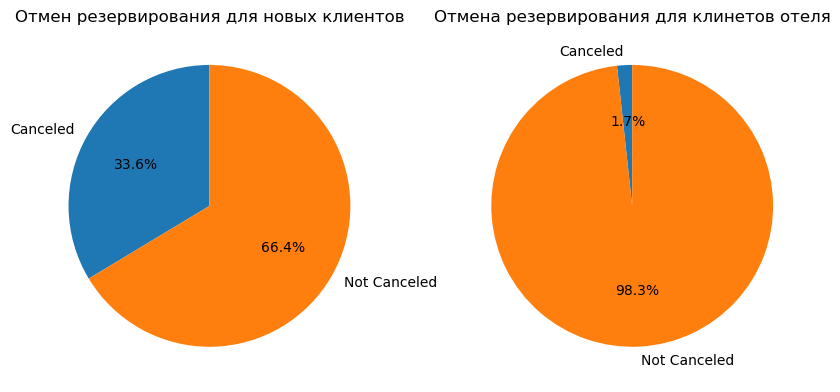

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'aspect': 'equal'})
ax[0].pie([11896,23476], labels=["Canceled","Not Canceled"], autopct='%1.1f%%', startangle=90)
ax[0].set_title("Отмен резервирования для новых клиентов")
ax[1].pie([16,914], labels=["Canceled","Not Canceled"], autopct='%1.1f%%', startangle=90)
ax[1].set_title("Отмена резервирования для клинетов отеля");

**Наибольшее количество отмен резервирования отмечаються для новых клиентов, которые в отеле ни разу не были**

**Клиенты которые уже посещали отель редко отменяют резервирование**

### Обработка признаков

Целевой признак **booking_status**

Преобразуем значение признака "Not_Canceled" в 0, а "Canceled" в 1.

In [18]:
df.booking_status = df.booking_status.replace({"Not_Canceled":0, "Canceled":1})

#### Отобразим матрицу корреляции признаков

<AxesSubplot:>

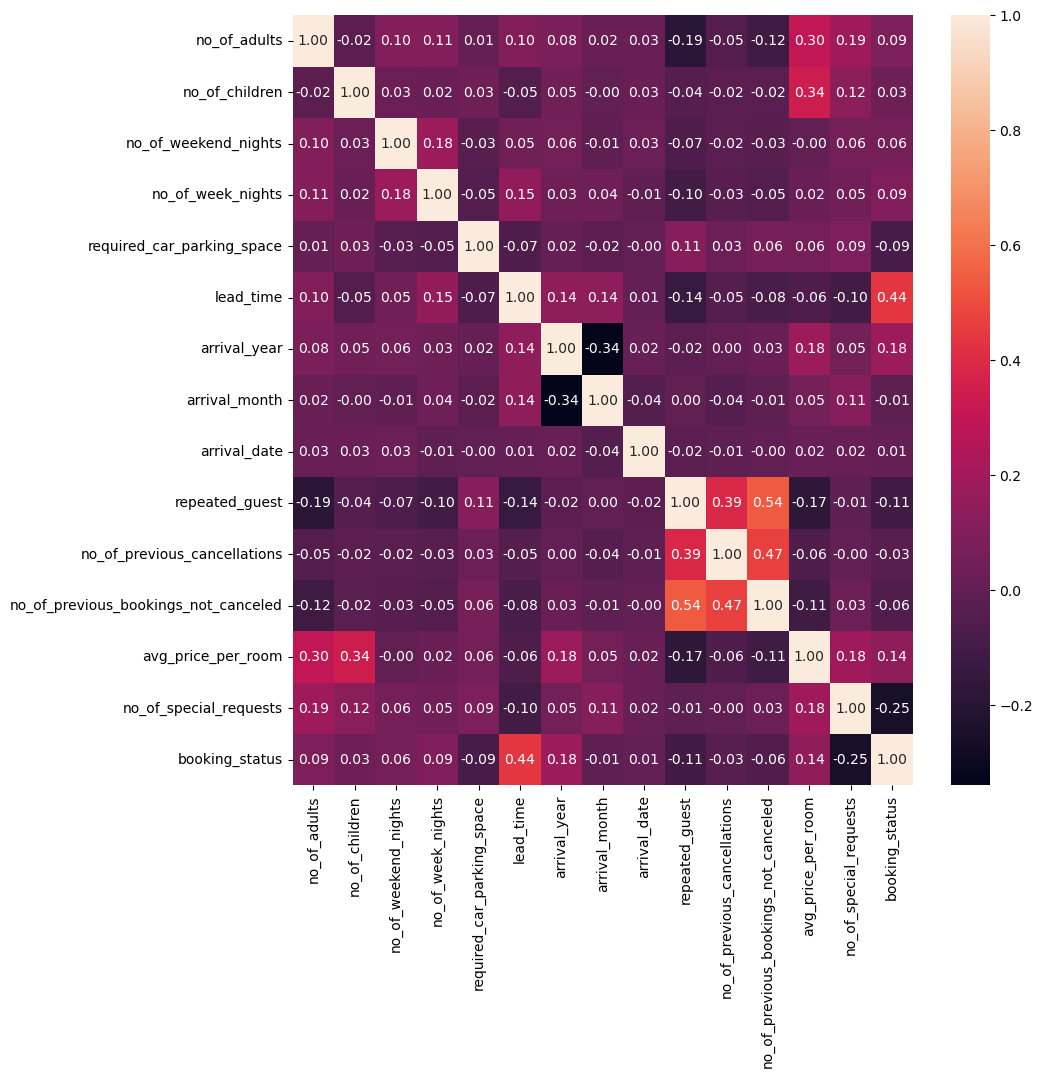

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, fmt=".2f")

Признаки **no_of_adults** и **no_of_children**

Обьединим данные признаки в один **no_of_people** так как данные признаки предоставляют по смыслу одну и туже услугу резервирования. А сами признаки удалим из датасета. Ообьединение признаков произведем понижением размерности при помощи метода главных компонент

In [20]:
pca = PCA(n_components=1)
pca_no_people = pca.fit_transform(df[["no_of_adults","no_of_children"]])
df["no_of_people"] = pca_no_people

df.drop(columns=["no_of_adults","no_of_children"],inplace=True)

Признаки **no_of_weekend_nights** и **no_of_week_nights**

То же самое что и выше проделаем для данных признаков по тем же причинам

In [21]:
pca_no_week = pca.fit_transform(df[["no_of_weekend_nights","no_of_week_nights"]])
df["no_of_week_days"] = pca_no_week

df.drop(columns=["no_of_weekend_nights","no_of_week_nights"],inplace=True)

Признак **arrival_month**

Преобразуем месяц резервирования в категориальный признак следующим образом:
    
    Если для конкретного месяца процент отношения клиентов которые не отменили резервирование к клиентам которые отменили резервирование > 50% - заменим на 1, в противном случае на 0

In [22]:
# Сгрупируем все записи по месяцу и целевому признаку
month_booking_grp = df.groupby(["arrival_month","booking_status"]).count().reset_index()
rate_by_months = []

# найдем процент отношения клиентов не отменивших резервирования к клиентам отменившим резервирование
for i in range(1,13):
    x = month_booking_grp[month_booking_grp.arrival_month == i]
    rate = x[x.booking_status == 1].Booking_ID.values / x[x.booking_status == 0].Booking_ID.values * 100
    rate_by_months.append(rate)

Выведем полученое процентное соотношение:

In [23]:
pd.Series(rate_by_months)

0     [2.4242424242424243]
1      [33.75196232339089]
2      [42.21954161640531]
3      [57.15106260769672]
4      [57.45454545454546]
5      [67.52092050209205]
6      [81.81818181818183]
7                   [64.0]
8     [50.048812235600394]
9      [54.69886528949666]
10     [41.56769596199525]
11    [15.349369988545247]
dtype: object

Поменяем месяцы: 4, 5, 6, 7, 8, 10 на 1 а оставшиеся на 0:

In [24]:
df.arrival_month = df.arrival_month.replace({4:1, 5:1, 6:1, 7:1, 8:1, 10:1, 1:0, 2:0, 3:0, 9:0, 11:0, 12:0})

Признаки **no_of_previous_cancellations** и **no_of_previous_bookings_not_canceled**

Создадим новый признак **cancellations_rate** который будет отражать рейтинг отмен резервирования в процентах и затем удалем данные два признака из датасета:

In [25]:
df["cancellations_rate"] = df["no_of_previous_cancellations"] / (df["no_of_previous_cancellations"] + df["no_of_previous_bookings_not_canceled"]) *100
# Для тех строк для которых получаем NaN заменяем на 0
df.cancellations_rate.fillna(0,inplace=True)

In [26]:
df.cancellations_rate.value_counts()

0.000000      35937
100.000000      118
16.666667        16
20.000000        15
33.333333        15
              ...  
8.928571          1
12.000000         1
7.500000          1
7.894737          1
19.047619         1
Name: cancellations_rate, Length: 81, dtype: int64

In [27]:
# Удаляем из датасета оригинальные признаки
df.drop(columns=["no_of_previous_cancellations","no_of_previous_bookings_not_canceled"],inplace=True)

### Выбор признаков для модели

#### Отобразим матрицу корреляции

<AxesSubplot:>

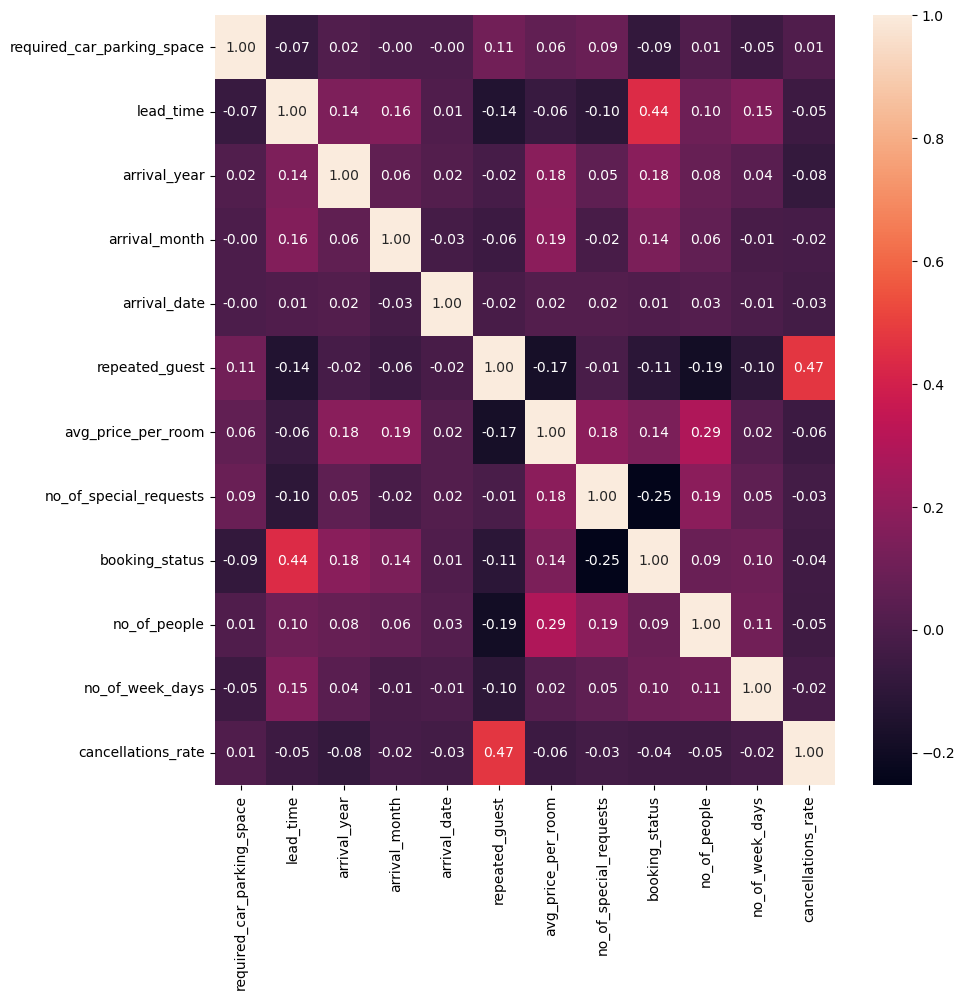

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, fmt=".2f")

#### Выводы

1. Пизнак **Booking_ID** ни имеет смысла использовать так как это просто уникальный идентификатор записи и не оказывает никакого эффекта на результат
2. Не иммет смысл передавать в модель признак **arrival_date** так как его кореляция с целевым признаком крайне мала
3. Хотя признак **arrival_year** имеет хорошую кореляцию с целевым признаком, я не буду его использовать, так как у нас всего два года 2017, 2018. При этом 2018 был годом пандемии и естественно в нем произошло много отмен резервирования, поэтому для дальнейших предсказаний это может повиять в худшую сторону.
4. Так же можно исключить признак **room_type_reserved** так как лн хорошо соотноситься с признаком **avg_price_per_room** а второй для нас имеет большее значение.
5. Так же не будем использовать признак **cancellations_rate** так как он так же слабо коррелирует с целевым признаком

In [29]:
df.drop(columns=["Booking_ID","room_type_reserved","arrival_year",
                 "arrival_date","cancellations_rate"],inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   type_of_meal_plan           36275 non-null  object 
 1   required_car_parking_space  36275 non-null  int64  
 2   lead_time                   36275 non-null  int64  
 3   arrival_month               36275 non-null  int64  
 4   market_segment_type         36275 non-null  object 
 5   repeated_guest              36275 non-null  int64  
 6   avg_price_per_room          36275 non-null  float64
 7   no_of_special_requests      36275 non-null  int64  
 8   booking_status              36275 non-null  int64  
 9   no_of_people                36275 non-null  float64
 10  no_of_week_days             36275 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 3.0+ MB


### Собираем pipeline

In [30]:
numeric_columns = ['lead_time', 'avg_price_per_room', 'no_of_people', 'no_of_week_days', 'no_of_special_requests']
other_numeric_columns = ['required_car_parking_space', 'arrival_month', 'repeated_guest']
categorical_columns = ['type_of_meal_plan', 'market_segment_type']

In [31]:
#combine
final_transformer = list()
    
for num_col in numeric_columns:
    num_transformer = Pipeline([
                                 ('selector', NumberSelector(key=num_col)),
                                 ('scaler', RobustScaler())
                                ])
    final_transformer.append((num_col, num_transformer))
    
for num_col in other_numeric_columns:
    num_transformer = Pipeline([
                                ('selector', NumberSelector(key=num_col))
                               ])
    final_transformer.append((num_col, num_transformer))
    
for cat_col in categorical_columns:
    cat_transformer = Pipeline([
                                ('selector', FeatureSelector(column=cat_col)),
                                ('ohe', OHEEncoder(key=cat_col))
                               ])
    final_transformer.append((cat_col, cat_transformer))

feats = FeatureUnion(final_transformer)

In [32]:
features_processing = Pipeline([('feats', feats)])

#### Разобьем датасет на тестовую и тренировочную выборки

In [33]:
X = df.drop(columns="booking_status")
y = df.booking_status

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("Train_x :",X_train.shape)
print("Test_x :",X_test.shape)
print("Train_y :",y_train.shape)
print("Test_y :",y_test.shape)

Train_x : (25392, 10)
Test_x : (10883, 10)
Train_y : (25392,)
Test_y : (10883,)


### Моделирование

#### Модель RandomForestClassifier

In [36]:
pipeline = Pipeline([
    ('features', features_processing),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

In [37]:
#обучим наш пайплайн
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 Pipeline(steps=[('feats',
                                  FeatureUnion(transformer_list=[('lead_time',
                                                                  Pipeline(steps=[('selector',
                                                                                   NumberSelector(key='lead_time')),
                                                                                  ('scaler',
                                                                                   RobustScaler())])),
                                                                 ('avg_price_per_room',
                                                                  Pipeline(steps=[('selector',
                                                                                   NumberSelector(key='avg_price_per_room')),
                                                                                  ('scaler',
                                       

In [38]:
print("Точность Random Forest : % {}".format(pipeline.score(X_test,y_test)*100))

Точность Random Forest : % 88.57851695304603


In [39]:
#наши прогнозы для тестовой выборки
preds = pipeline.predict_proba(X_test)[:, 1]

In [40]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)

fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.430000, F-Score=0.826, Precision=0.830, Recall=0.822


#### Сохраним модель (пайплайн)

In [41]:
with open("rf_pipeline.dill", "wb") as f:
    dill.dump(pipeline, f)

In [52]:
model_release_dict = {
    'version': '0.0.1',
    'model': 'RandomForrest',
    'model_type': 'pipeline',
    'date': '2023-02-08',
    'features': ['type_of_meal_plan','required_car_parking_space','lead_time','arrival_month',
                 'market_segment_type','repeated_guest','avg_price_per_room','no_of_special_requests',
                 'no_of_people','no_of_week_days'],
    'target': 'booking_status',
    'scalers': ['RobustScaler', 'OHEncoding']
}

In [53]:
with open('model_info.json', 'w') as outfile:
    json.dump(model_release_dict, outfile)

#### Модель LogisticRegression

In [70]:
pipeline_lr = Pipeline([
    ('features', features_processing),
    ('classifier', LogisticRegression(random_state = 42)),
])

In [71]:
#обучим наш пайплайн
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('features',
                 Pipeline(steps=[('feats',
                                  FeatureUnion(transformer_list=[('lead_time',
                                                                  Pipeline(steps=[('selector',
                                                                                   NumberSelector(key='lead_time')),
                                                                                  ('scaler',
                                                                                   RobustScaler())])),
                                                                 ('avg_price_per_room',
                                                                  Pipeline(steps=[('selector',
                                                                                   NumberSelector(key='avg_price_per_room')),
                                                                                  ('scaler',
                                       

In [72]:
print("Точность Random Forest : % {}".format(pipeline_lr.score(X_test,y_test)*100))

Точность Random Forest : % 79.9411926858403


In [73]:
#наши прогнозы для тестовой выборки
preds = pipeline_lr.predict_proba(X_test)[:, 1]

In [74]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)

fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.318946, F-Score=0.702, Precision=0.649, Recall=0.764


#### Сохраним модель (пайплайн)

In [75]:
with open("lr_pipeline.dill", "wb") as f:
    dill.dump(pipeline_lr, f)

In [76]:
model_release_dict = {
    'version': '0.0.1',
    'model': 'LogisticRegression',
    'model_type': 'pipeline',
    'date': '2023-02-08',
    'features': ['type_of_meal_plan','required_car_parking_space','lead_time','arrival_month',
                 'market_segment_type','repeated_guest','avg_price_per_room','no_of_special_requests',
                 'no_of_people','no_of_week_days'],
    'target': 'booking_status',
    'scalers': ['RobustScaler', 'OHEncoding']
}

In [77]:
with open('model_info.json', 'w') as outfile:
    json.dump(model_release_dict, outfile)

## Часть 2

#### Модель RandomForrest

In [78]:
with open('rf_pipeline.dill', 'rb') as in_strm:
    rf_pipeline = dill.load(in_strm)

In [79]:
predictions = rf_pipeline.predict_proba(X_test.iloc[:1500])
pd.DataFrame({'preds': predictions[:, 1]}).to_csv("test_predictions.csv", index=None)

In [80]:
roc_auc_score(y_score=predictions[:, 1][:], y_true=y_test.iloc[:1500])

0.9403664354203709

#### Модель LogisticRegression

In [82]:
with open('lr_pipeline.dill', 'rb') as in_strm:
    lr_pipeline = dill.load(in_strm)

In [83]:
predictions = lr_pipeline.predict_proba(X_test.iloc[:1500])
pd.DataFrame({'preds': predictions[:, 1]}).to_csv("test_predictions.csv", index=None)

In [84]:
roc_auc_score(y_score=predictions[:, 1][:], y_true=y_test.iloc[:1500])

0.868572596520193

## Часть 3

In [101]:
def get_prediction(x):

    myurl = "http://192.168.17.69:8180/predict"
    #myurl = "http://192.168.56.1:8180/predict"
    req = request.Request(myurl)
    req.add_header('Content-Type', 'application/json; charset=utf-8')
    jsondata = json.dumps(x)
    jsondataasbytes = jsondata.encode('utf-8')   # needs to be bytes
    req.add_header('Content-Length', len(jsondataasbytes))
    #print (jsondataasbytes)
    response = request.urlopen(req, jsondataasbytes)
    return json.loads(response.read())['predictions']

In [55]:
x_dict = X_train.head(1).to_dict()

In [98]:
x_dict

{'type_of_meal_plan': {29580: 'Meal Plan 1'},
 'required_car_parking_space': {29580: 0},
 'lead_time': {29580: 200},
 'arrival_month': {29580: 1},
 'market_segment_type': {29580: 'Online'},
 'repeated_guest': {29580: 0},
 'avg_price_per_room': {29580: 90.95},
 'no_of_special_requests': {29580: 0},
 'no_of_people': {29580: 0.1589820752476897},
 'no_of_week_days': {29580: 0.8163465215828232}}

In [86]:
pipeline.predict_proba(pd.DataFrame(x_dict))

array([[0., 1.]])

In [102]:
%%time
get_prediction(x_dict)

Wall time: 54.3 ms


1.0

In [59]:
predictions

array([[0.99, 0.01],
       [0.96, 0.04],
       [0.89, 0.11],
       ...,
       [0.4 , 0.6 ],
       [0.  , 1.  ],
       [0.48, 0.52]])

In [48]:
df.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64